#mengmeng wu
#data cleaning 
#decision tree and random forest model building
#model evalution

In [31]:
import pandas as pd
import numpy as np

In [253]:
df = pd.read_csv("final_merge_ca.csv") 

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_21553/3057298602.py:1: DtypeWarning: Columns (10,11,16,17,22,23,28,29,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,100,101,102,103,104,105,106,107,108,109,110,111,118,119,122,123,124,125,128,129,136,137,138,139,142,143,144,145,190,191,192,193,226,362,363,366,367,370,371,374,375,378,379,382,383,386,387,390,391,394,395,398,399,402,403,406,407,410,411,414,415,418,419,420,421,426,427,430,431,434,435,438,439,446,447,450,451,470,471,474,475,478,479,482,483,486,487,490,491,494,495,498,499,502,503,506,507,510,511,514,515,518,519,522,523,526,527,530,531,534,535,538,539,542,543,546,547,550,551,554,555,558,559,562,563,566,567,570,571,574,575,578,579,582,583,590,591,594,595,598,599,602,603,606,607,610,611,618,619,622,623,626,627,630,631,634,635,638,639,642,643,646,647,650,651,654,655,658,659,662,663,666,667,670,671,674,675) 

### data cleaning

In [254]:
df.shape

(2346, 683)

In [155]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GEO_ID', 'NAME_x', 'S1501_C01_001E',
       'S1501_C01_001M', 'S1501_C02_001E', 'S1501_C02_001M', 'S1501_C03_001E',
       'S1501_C03_001M',
       ...
       'DP05_0080M', 'DP05_0080PE', 'DP05_0080PM', 'DP05_0081E', 'DP05_0081M',
       'DP05_0081PE', 'DP05_0081PM', 'Unnamed: 326', 'in_county', 'target'],
      dtype='object', length=683)

In [255]:
#select the variables we need
selected_columns = ['target',"S1501_C01_014E","S1903_C02_001E", "S1903_C02_002E", "S1903_C02_003E", "DP05_0032PE", "DP05_0033PE"]

In [256]:
#mapping colname using codebook
colname_dic = {"S1501_C01_014E": "highschool degree or higher rate", 
               "S1903_C02_001E": "household median income", 
               "S1903_C02_002E": "white household median income",
               "S1903_C02_003E": "black household median income",
               "DP05_0032PE": "white race rate",
               "DP05_0033PE": "black race rate",
               "target": "one or more homicides"
               }

In [257]:
df = df[selected_columns]

In [258]:
df.columns

Index(['target', 'S1501_C01_014E', 'S1903_C02_001E', 'S1903_C02_002E',
       'S1903_C02_003E', 'DP05_0032PE', 'DP05_0033PE'],
      dtype='object')

In [259]:
#check if there is missing values 
null_sum = df.isnull().sum()

null_sum

target            0
S1501_C01_014E    0
S1903_C02_001E    0
S1903_C02_002E    0
S1903_C02_003E    0
DP05_0032PE       0
DP05_0033PE       0
dtype: int64

In [260]:
df["S1501_C01_014E"].value_counts()

S1501_C01_014E
-        18
100.0    12
94.6     11
96.8     10
96.3      9
         ..
43.1      1
38.7      1
34.0      1
58.7      1
0.0       1
Name: count, Length: 1020, dtype: int64

In [261]:
#replace dash with missing value
df.replace('-', np.nan, inplace=True)

In [262]:
df.isna().sum()

target              0
S1501_C01_014E     18
S1903_C02_001E     34
S1903_C02_002E     40
S1903_C02_003E    941
DP05_0032PE        17
DP05_0033PE        17
dtype: int64

In [263]:
x_variable = ["S1501_C01_014E","S1903_C02_001E", "S1903_C02_002E", "S1903_C02_003E", "DP05_0032PE", "DP05_0033PE"]

In [264]:
#remove the str expressions before changing data type
for x in x_variable:
    df[x] = df[x].replace({
        ',': '',
        r'\-$': '',
        r'\+$': ''
    }, regex=True)


In [265]:
df.isna().sum()

target              0
S1501_C01_014E     18
S1903_C02_001E     34
S1903_C02_002E     40
S1903_C02_003E    941
DP05_0032PE        17
DP05_0033PE        17
dtype: int64

In [266]:
df["S1501_C01_014E"].value_counts()

S1501_C01_014E
100.0    12
94.6     11
96.8     10
94.8      9
95.9      9
         ..
43.1      1
38.7      1
34.0      1
58.7      1
0.0       1
Name: count, Length: 1019, dtype: int64

In [267]:
#convert the data type to numerical value
df[selected_columns] = df[selected_columns].astype('float')
df2 = df.copy()


In [268]:
#replace missing value in x using mean
for col in x_variable:  
    df[col].fillna(value = df[col].mean(), inplace=True)

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_21553/1433626373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value = df[col].mean(), inplace=True)


In [269]:
#drop missing value in x 
df2 = df2.dropna(subset=x_variable)

In [270]:
#check target value distribution
print(df['target'].value_counts())
print(df2['target'].value_counts())

target
0.0    1944
1.0     402
Name: count, dtype: int64
target
0.0    1131
1.0     271
Name: count, dtype: int64


In [416]:
#rename the column name
df.rename(columns=colname_dic, inplace=True)
df2.rename(columns=colname_dic, inplace=True)
x_variables = [col for col in df.columns if col != 'one or more homicides']

<Axes: xlabel='household median income', ylabel='Count'>

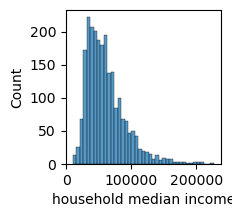

In [301]:
#data transformation
#check data distribution
import seaborn as sns
sns.histplot(df['household median income'])

In [304]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df[x_variables] = scaler.fit_transform(df[x_variables])

### model training

In [305]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (2.0, 2.0)
%matplotlib inline

In [405]:
X = df[[col for col in df.columns if col != 'one or more homicides']]
y = df["one or more homicides"]

In [406]:
# split the data into training and testing set
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=929) 

In [407]:
#for training data, spliting into one part for training and another for validation
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=929)

In [408]:
# Create a DecisionTreeClassifier object.  
# 1. From the start, set criterion = "entropy" and random_state =929, and keep all the other parameters with the default value.
dt_clf1 = DecisionTreeClassifier(random_state=929,criterion='entropy') 

In [409]:
dt_clf1 = dt_clf1.fit(X_train, y_train)

In [410]:
# 2. Evaluate the DecisionTreeClassifier performance on the validating set
np.round(dt_clf1.score(X_val, y_val),3)

0.699

In [417]:
pd.DataFrame([np.round(dt_clf1.feature_importances_,2)], columns= x_variables)

,highschool degree over higher rate,household median income,white household median income,black household median income,white race rate,black race rate
0,0.16,0.17,0.2,0.1,0.19,0.18


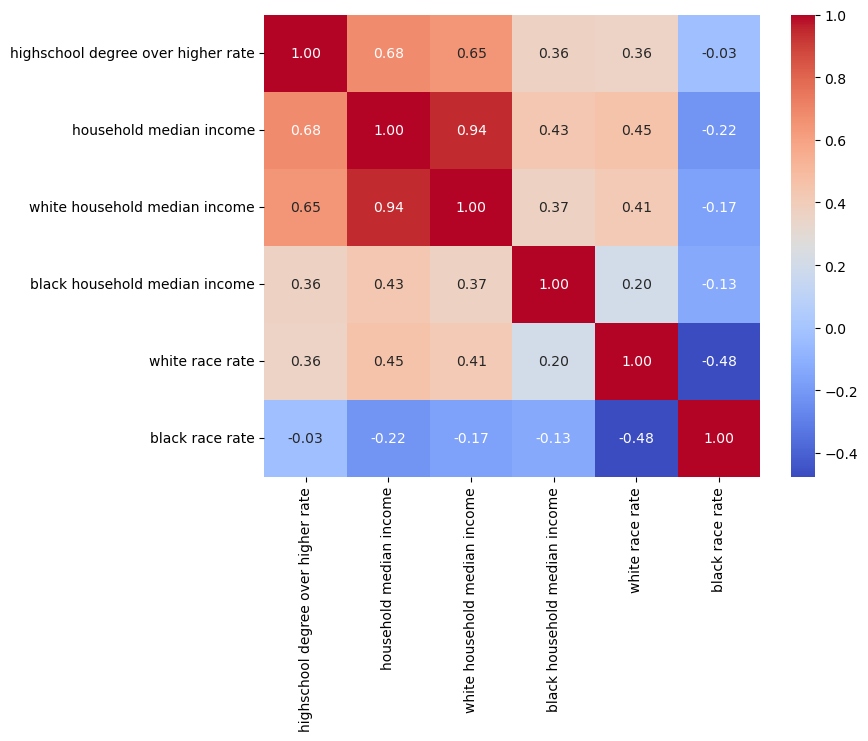

In [418]:
corr_matrix = df[x_variables].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [419]:
# based on the feature importance and multicollinearity， I further filtered out two features
x_variables = ['highschool degree over higher rate', 'white household median income',
              'white race rate', 'black race rate']

In [420]:
df_update = df[x_variables + ['one or more homicides']]

In [421]:
#check model complexity
dt_clf1.get_n_leaves()

250

In [422]:
dt_clf1.get_depth()

31

In [423]:
dt_clf1.tree_.n_node_samples

array([1500,  585,  518,    9,    3,    6,  509,   84,   27,   57,   38,
         37,   25,   23,    6,   17,   15,    6,    2,    4,    3,    1,
          9,    2,    2,   12,    1,   19,  425,    3,  422,  305,   77,
         68,    1,   67,   66,    4,    2,    2,   62,   21,   41,    1,
         40,    1,   39,   32,   29,   24,   21,    3,    1,    2,    5,
          2,    3,    2,    1,    3,    2,    1,    7,    1,    9,  228,
          7,    4,    3,    1,    2,  221,  219,   15,   12,    3,    1,
          2,  204,   20,   16,   11,    7,    5,    2,    4,    5,    4,
        184,   20,    6,    2,    4,   14,  164,    4,    3,    1,  160,
          7,  153,   63,   48,   36,   21,   11,   10,    1,   10,    5,
          5,    4,    1,   15,   12,   10,    6,    2,    4,    1,    3,
          4,    2,   15,   12,    6,    1,    5,    6,    3,    3,    1,
          2,    3,   90,   10,    3,    7,    1,    6,   80,   71,   69,
         52,   48,   24,   18,    6,    3,    3,   

In [424]:
#considering the model complexity, it may risk overfitting. tune parameters based on the original model
dt_clf2 = DecisionTreeClassifier(random_state=929,criterion='entropy', max_depth = 15, max_features = 4) 

In [475]:
X = df_update[x_variables]
y = df["one or more homicides"]
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=929) 
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state=929)

In [476]:
dt_clf2 = dt_clf2.fit(X_train, y_train)

In [477]:
#using iteration and find an optimal depth
max_depth_range = range(1, 100, 5)  
test_scores = []

for depth in max_depth_range:
    dt_clf2 = DecisionTreeClassifier(random_state=929, criterion='entropy', max_depth=depth, max_features=4,class_weight='balanced')
    dt_clf2.fit(X_train, y_train)
    score = np.round(dt_clf2.score(X_val, y_val), 3)
    test_scores.append(score)
test_scores

[0.572,
 0.598,
 0.628,
 0.66,
 0.713,
 0.723,
 0.723,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737,
 0.737]

the model performance decreases and remains at 0.73，suggesting max depth over 50 may risk overfitting. further explore between depth 20-40. also，the target value of 1 and o is not equal, with the number of 1 much smallr, so i use class weight for adjusting

In [478]:
max_depth_range = range(20, 40, 1)  
test_scores = []

for depth in max_depth_range:
    dt_clf2 = DecisionTreeClassifier(random_state=929, criterion='entropy', max_depth=depth, max_features=4,class_weight='balanced')
    dt_clf2.fit(X_train, y_train)
    score = np.round(dt_clf2.score(X_val, y_val), 3)
    test_scores.append(score)
test_scores

[0.654,
 0.713,
 0.734,
 0.678,
 0.755,
 0.745,
 0.723,
 0.731,
 0.707,
 0.715,
 0.721,
 0.723,
 0.721,
 0.737,
 0.731,
 0.731,
 0.737,
 0.737,
 0.737,
 0.737]

In [495]:
#choose max_depth = 24, cause performance there is a marked fall after that
dt_clf2 = DecisionTreeClassifier(random_state=929, criterion='entropy', max_depth=24, max_features=4, class_weight='balanced')
dt_clf2.fit(X_train, y_train)
np.round(dt_clf2.score(X_val, y_val), 3)

0.755

In [486]:
pd.DataFrame([np.round(dt_clf2.feature_importances_,2)], columns= x_variables)

,highschool degree over higher rate,white household median income,white race rate,black race rate
0,0.34,0.23,0.2,0.24


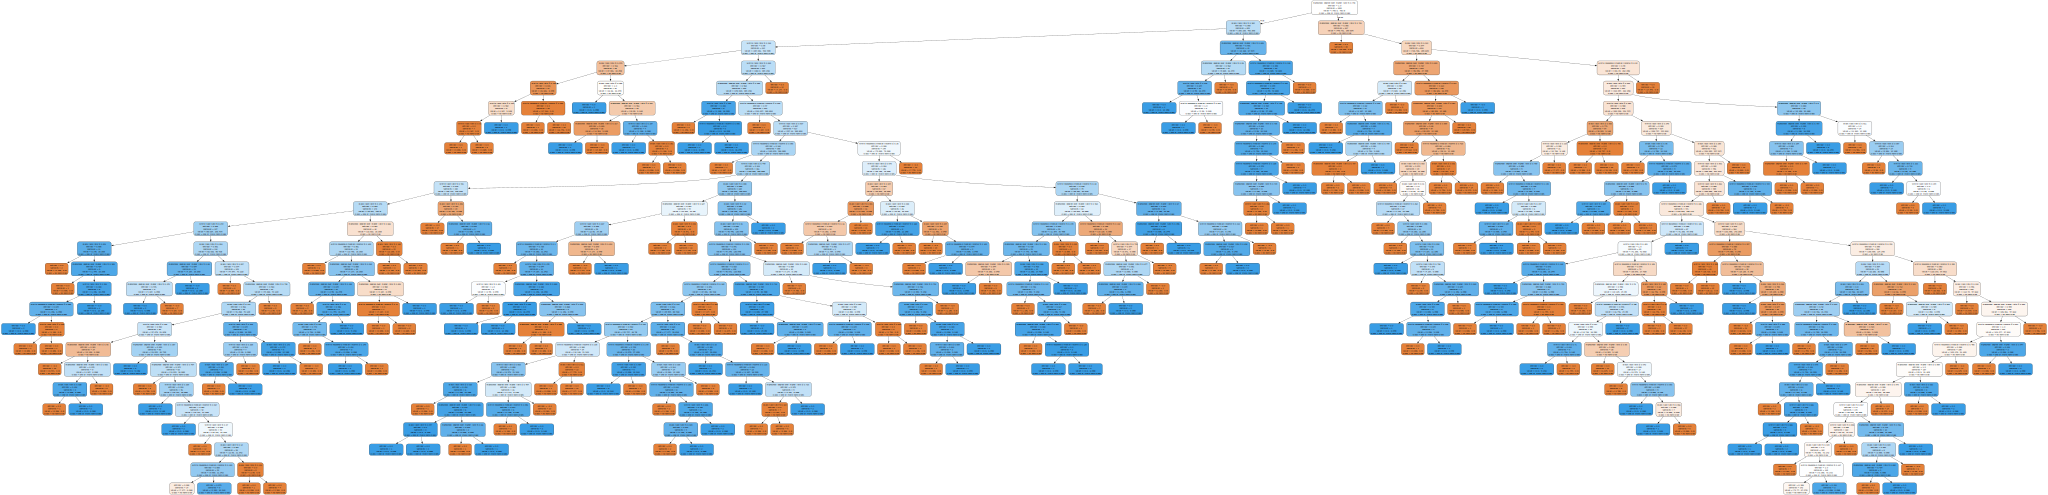

In [487]:
#Visualize the decision path
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"
dot_data = tree.export_graphviz(dt_clf2, out_file=None, 
                                feature_names= x_variables, 
                                class_names=["no homicide", "one or more homicides"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [541]:
#random forest
from sklearn.ensemble import RandomForestClassifier
dt_clf3 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 929,class_weight='balanced',max_depth = 20)

In [542]:
dt_clf3 = dt_clf3.fit(X_train, y_train)
np.round(dt_clf3.score(X_val,y_val),3)

0.816

### model evalution

In [460]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [532]:
y_pred = dt_clf2.predict(X_test)
y_true = y_test

In [533]:
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[327,  54],
       [ 76,  13]])

In [534]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred,labels=[1,0]).ravel()
tn, fp, fn, tp 

(13, 76, 54, 327)

In [535]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       381
         1.0       0.19      0.15      0.17        89

    accuracy                           0.72       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.69      0.72      0.71       470



In [543]:
y_pred = dt_clf3.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       381
         1.0       0.12      0.01      0.02        89

    accuracy                           0.80       470
   macro avg       0.47      0.50      0.45       470
weighted avg       0.68      0.80      0.72       470



In [544]:
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[374,   7],
       [ 88,   1]])

The models are more inclined to predict class 0 (No Homicide), which may still be a problem of class imbalance, even when using class_weight adjustment. in RandomForest, even if accuracy improves, recall can be lower because the model may favor the majority class, leading to a high number of false negatives for the minority class (homicide events). This is due to the model's tendency to focus on the majority class to optimize accuracy, causing it to underperform on identifying rare but critical events like homicides.
In practice, Homicide events are not being correctly identified, which can be dangerous in the real world applications.